imported python libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyodbc
import pymssql

# Data Acquisition
## Demos

### Pandas First Steps

In [2]:
# Pandas DataFrame - 2D (rows and cols) matrix (table)
cats_and_dogs = pd.DataFrame({"cats": [1, 2, 3], "dogs": [10, 20, 30]})

In [3]:
cats_and_dogs

,cats,dogs
0,1,10
1,2,20
2,3,30


In [4]:
cats_and_dogs.shape # take the shape of the table (rows, cols)

(3, 2)

In [5]:
type(cats_and_dogs)

pandas.core.frame.DataFrame

In [6]:
numbers = pd.Series([1, 3, 5.5, 7.2]) # Pandas Series - only cols

In [7]:
numbers

0    1.0
1    3.0
2    5.5
3    7.2
dtype: float64

In [8]:
type(numbers)

pandas.core.series.Series

In [9]:
cats_and_dogs["cats"]

0    1
1    2
2    3
Name: cats, dtype: int64

In [10]:
type(cats_and_dogs["cats"])

pandas.core.series.Series

### Pandas read CSV

In [11]:
accidents_data = pd.read_csv("data/accidents.csv")

In [12]:
accidents_data

,Miles from Home,% of Accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [13]:
accidents_data["Miles from Home"] # take the col (Series)

0    less than 1
1         1 to 5
2        6 to 10
3       11 to 15
4       16 to 20
5        over 20
Name: Miles from Home, dtype: object

In [14]:
accidents_data.loc[0] # take row

Miles from Home    less than 1
% of Accidents              23
Name: 0, dtype: object

In [15]:
accidents_data.loc[3, "% of Accidents"] # take cell

8

In [16]:
accidents_data.shape

(6, 2)

In [17]:
accidents_data.dtypes # take the types of the data (rows and cols)

Miles from Home    object
% of Accidents      int64
dtype: object

In [18]:
accidents_data.index # take all indecies

RangeIndex(start=0, stop=6, step=1)

In [19]:
accidents_data.columns # take all cols (name)

Index(['Miles from Home', '% of Accidents'], dtype='object')

In [20]:
# read data using link https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
car_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", header=None)

In [21]:
car_data # in this data there is no headers (col names)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [22]:
# give names of the cols
car_data.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "acceptability"]

In [23]:
car_data

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [24]:
car_data.dtypes # all vars are strings

buying           object
maint            object
doors            object
persons          object
lug_boot         object
safety           object
acceptability    object
dtype: object

In [25]:
car_data["buying"].unique() # take the unique vals of the co

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [26]:
car_data.groupby("doors").size() # group col

doors
2        432
3        432
4        432
5more    432
dtype: int64

### Pandas read EXCEL

In [27]:
# if there are more than 1 sheet, we can open every sheet with (pd.read_excel("file")[sheet No])
green_trip_data = pd.read_excel("data/green_tripdata_2015-09.xls")

In [28]:
green_trip_data

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,2,2015-09-02 16:51:59,2015-09-02 17:04:00,N,1,-73.829605,40.759716,-73.832214,40.751514,1,...,9.0,1.0,0.5,0.00,0.0,NaN,0.3,10.80,2,1
65531,2,2015-09-02 16:53:51,2015-09-02 17:04:32,N,1,-73.962112,40.805710,-73.984970,40.769550,1,...,10.5,1.0,0.5,2.46,0.0,NaN,0.3,14.76,1,1
65532,2,2015-09-02 16:57:21,2015-09-02 17:05:03,N,1,-73.829941,40.713718,-73.831917,40.702145,1,...,7.0,1.0,0.5,2.20,0.0,NaN,0.3,11.00,1,1
65533,2,2015-09-02 16:51:42,2015-09-02 17:05:28,N,1,-73.860748,40.832661,-73.845169,40.845306,1,...,10.5,1.0,0.5,2.46,0.0,NaN,0.3,14.76,1,1


In [29]:
green_trip_data.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                         int64
dtype: object

In [30]:
green_trip_data["lpep_pickup_datetime"].dt.year.unique() # take year of the date

array([2015])

In [31]:
green_trip_data["lpep_pickup_datetime"].dt.month.unique() # take month of the data

array([9])

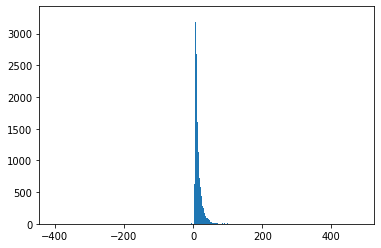

In [32]:
# some analysis of total amount
plt.hist(green_trip_data["Total_amount"], bins="fd")
plt.show()

In [33]:
green_trip_data[green_trip_data["Total_amount"] < 0]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
196,2,2015-09-01 00:11:22,2015-09-01 00:20:26,N,1,-73.949593,40.680508,-73.942253,40.700764,1,...,-2.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-3.8,3,1
437,2,2015-09-01 00:31:49,2015-09-01 00:35:08,N,1,-73.903450,40.745419,-73.914360,40.745659,5,...,-4.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-5.8,4,1
568,2,2015-09-01 00:43:31,2015-09-01 00:44:41,N,1,-73.844284,40.721066,-73.844727,40.720230,1,...,-3.0,-0.5,-0.5,0.0,0.0,NaN,-0.3,-4.3,3,1
961,2,2015-09-01 00:14:55,2015-09-01 00:15:11,N,2,-73.946716,40.714317,-73.944954,40.714466,2,...,-52.0,0.0,-0.5,0.0,0.0,NaN,-0.3,-52.8,4,1
1297,2,2015-09-01 01:00:16,2015-09-01 01:01:07,N,1,-73.863174,40.835274,-73.868782,40.836048,1,...,-2.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-3.8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62113,2,2015-09-02 15:12:08,2015-09-02 15:12:12,N,1,-73.824844,40.677002,-73.824837,40.677029,1,...,-2.5,0.0,-0.5,0.0,0.0,NaN,-0.3,-3.3,3,1
62252,2,2015-09-02 15:04:03,2015-09-02 15:04:39,N,1,-73.962517,40.809719,-73.962761,40.809769,1,...,-2.5,0.0,-0.5,0.0,0.0,NaN,-0.3,-3.3,3,1
62432,2,2015-09-02 15:25:44,2015-09-02 15:31:13,N,1,-73.876099,40.876999,-73.875603,40.877567,1,...,-5.0,0.0,-0.5,0.0,0.0,NaN,-0.3,-5.8,3,1
64197,2,2015-09-02 16:03:36,2015-09-02 16:04:12,N,1,-73.899155,40.679638,-73.898666,40.678555,1,...,-2.5,-1.0,-0.5,0.0,0.0,NaN,-0.3,-4.3,4,1


In [34]:
green_trip_data[green_trip_data["Total_amount"] < 0]["Total_amount"]

196      -3.8
437      -5.8
568      -4.3
961     -52.8
1297     -3.8
         ... 
62113    -3.3
62252    -3.3
62432    -5.8
64197    -4.3
64646   -23.3
Name: Total_amount, Length: 109, dtype: float64

### Pandas read JSON from WEB

In [35]:
# read from a json and orient the table by index. the orient can be make with transposition
books = pd.read_json("https://openlibrary.org/api/books?bibkeys=ISBN:9780345354907,ISBN:0881847690,LCCN:2005041555,ISBN:0060957905&format=json", orient=("index"))

In [36]:
books

,bib_key,info_url,preview,preview_url,thumbnail_url
ISBN:9780345354907,ISBN:9780345354907,https://openlibrary.org/books/OL9831606M/The_C...,borrow,https://archive.org/details/caseofcharlesdex00...,https://covers.openlibrary.org/b/id/207586-S.jpg
ISBN:0881847690,ISBN:0881847690,https://openlibrary.org/books/OL22232644M/Watc...,borrow,https://archive.org/details/watchersoutoftim00...,https://covers.openlibrary.org/b/id/9871313-S.jpg
LCCN:2005041555,LCCN:2005041555,https://openlibrary.org/books/OL3421202M/At_th...,borrow,https://archive.org/details/atmountainsofmad00...,https://covers.openlibrary.org/b/id/8259841-S.jpg
ISBN:0060957905,ISBN:0060957905,https://openlibrary.org/books/OL6784868M/Tales...,noview,https://openlibrary.org/books/OL6784868M/Tales...,https://covers.openlibrary.org/b/id/676505-S.jpg


In [37]:
books.loc["LCCN:2005041555", "preview_url"]

'https://archive.org/details/atmountainsofmad00love_0'

### Pandas read from DB - Problem with connection to SQL Server

In [38]:
# connection = pyodbc.connect(
#     """
#     Driver={ODBC Driver 17 for SQL Server};
#     Server=momchil-VirtualBox;
#     Database=AdventureWorks;
#     Trusted_Connection=no;
#     UID=antonov;
#     PWD=Karina0812;
#     """
# )

In [39]:
# print(pyodbc.drivers())

In [40]:
# connection = pymssql.connect(
#         server='momchil-VirtualBox:1433',
#         user='antonov', password='Karina0812',
#         database='AdventureWorks'
# )

In [41]:
# Using SQL like a text for first param and for second param use the connection
# all_cutomers = pd.read_sql("select * from Selas.Customer", connection)

In [42]:
# all_customers

In [43]:
# all_prodicts = pd.read_sql("selcet top 10 * Production.Product")

In [44]:
# all_products